In [1]:
import torch 
from src_v2.distill_datasets import LmdbDataset
from src_v2.distill_datasets import CombinedDataset, CombinedDatasetTrain, CombinedDatasetVal, LmdbDataset
from fairchem.core.common.registry import registry
from fairchem.core.datasets.ase_datasets import AseDBDataset
import numpy as np
from tqdm import tqdm
from torch.utils.data import Subset

In [2]:
a2g_args = {  
    # "molecule_cell_size": 120.0,
    "r_energy": True,
    "r_forces": True,
}
# teacher_labels_folder = '/data/ishan-amin/hessian_proj_data/labels/SPICE_labels/mace_off_large_SpiceAminos/force_jacobians'
# teacher_labels_folder =  '/data/ishan-amin/hessian_proj_data/labels/md22_labels/jmp-large_buckyball-catcher/force_jacobians'
teacher_labels_folder = '/data/ishan-amin/hessian_proj_data/labels/md22_labels/jmp-large_double-walled_nanotube/force_jacobians'
dataset = LmdbDataset(teacher_labels_folder)
hessian = dataset[1]
res = 0
for i in range(len(dataset)):
    hessian = dataset[i]
    num_atoms = int(np.sqrt(hessian.shape[0] / 9))
    hessian = hessian.reshape(num_atoms, 3, num_atoms, 3)
    rel_err = (hessian - hessian.permute(2,3,0,1)).abs().mean() / hessian.abs().mean()
    res = res * (i / (i + 1)) + (rel_err / (i + 1))
print(f"Relative error: {(res * 100):.2f} %")


Total entries across all LMDB files jacs: 760
Relative error: 7.86 %


In [4]:
len(dataset)
dataset[0].shape

torch.Size([1232100])

In [25]:

a2g_args = {  
    "molecule_cell_size": 120.0,
    "r_energy": True,
    "r_forces": True,
}
dataset_path = '/data/ishan-amin/OMOL/4M/subsets/OMol_subset/protein_ligand_pockets_val'
teacher_labels_folder = '/data/ishan-amin/OMOL/4M/subsets/OMol_subset_label_torch_autograd/protein_ligand_pockets_train_4M/final_labels'

dataset_path = '/data/ishan-amin/OMOL/4M/subsets/OMol_subset/protein_core_val'
teacher_labels_folder = '/data/ishan-amin/OMOL/4M/subsets/OMol_subset_label_finite_difference/protein_core_train_4M/final_labels'
dataset = CombinedDatasetVal({
                        "src": dataset_path,
                        "teacher_labels_folder": teacher_labels_folder,
                        "num_hessian_samples": 4,
                        "a2g_args": a2g_args,
                        })
print(len(dataset))
total_len = len(dataset)
indices = torch.randperm(total_len)[:2000].tolist()
dataset = Subset(dataset, indices)

print(f"Subset length: {len(dataset)}")

Total entries across all LMDB files jacs: 15851
15851
Subset length: 2000


In [26]:
dataset[0].forces.abs().mean()
datapoint = dataset[6]
(datapoint.forces - datapoint.teacher_forces).mean().item()

-6.710941306664608e-06

In [27]:
losses = []
for datapoint in tqdm(dataset):
    mae = (datapoint.forces - datapoint.teacher_forces).mean().item()
    losses.append(mae)
print(f"FORCE MAE: {np.mean(np.array(losses))} meV")

100%|██████████| 2000/2000 [00:02<00:00, 798.58it/s]

FORCE MAE: -4.0356269811692156e-07 meV


In [ ]:

force_jac_dataset = SimpleDataset('/data/ericqu/OMol_subset/OMol_subset/label/force_jacobians')
# jac_dataset_2 = SimpleDataset('/data/ishan-amin/hessian_proj_data/labels/SPICE_labels/mace_off_large_SpiceAminos/force_jacobians/')

# dataset_path = '/data/ishan-amin/hessian_proj_data/SPICE/spice_separated/Solvated_Amino_Acids/train'
indices = torch.load('/data/ericqu/OMol_subset/OMol_subset/label/indices')
dataset_path = '/data/ericqu/OMol_subset/OMol_subset/protein_interface_train_4M'
# dataset_path = '/data/shared/MLFF/MD22/95_lmdb/Ac-Ala3-NHMe/train'
# dataset_path = '/data/shared/MLFF/MD22/95_lmdb/AT-AT/train'
# dataset_path = '/data/ishan-amin/post_data/md17/ethanol/1k/train'
config = {"src": dataset_path}
dataset = registry.get_dataset_class("lmdb")(config)
# print(force_jac_dataset[20].reshape(126, 126))

In [8]:
force_jac_dataset = SimpleDataset('/data/ericqu/OMol_subset/OMol_subset/check_hessian/labels/force_jacobians')
indices = torch.load('/data/ericqu/OMol_subset/OMol_subset/check_hessian/labels/indices/train_indices_0000.pt')
dataset_path = '/data/ericqu/OMol_subset/OMol_subset/check_hessian'


a2g_args = {  
    "molecule_cell_size": 120.0,
    "r_energy": True,
    "r_forces": True,
}
dataset = AseDBDataset({
                        "src": dataset_path,
                        "a2g_args": a2g_args,
                        })
print(indices[0][0])

Total entries across all LMDB files jacs: 279
588


In [19]:
print(indices)
result = []
for arr in indices:
    for elem in arr:
        result.append(elem)
indices = result

[[588, 21883], [39264, 15777], [48052, 33893], [23067, 64497, 11622], [5111, 15149], [41666, 44755, 34258], [28687, 63817], [17578, 38343, 51924], [51334, 12024, 69473], [30848, 67775], [26843, 33643], [4475, 69771], [20538, 9618], [25562, 11305], [11319, 4645], [2050, 58383], [29006, 69250], [67458, 45275, 67006], [27995, 26311], [67614, 57646], [70504, 19788], [15978, 60855, 59938], [1489, 31002, 9210], [47900, 32430, 64266], [63189, 29622, 56550], [54247, 21392, 42457], [46659, 39092, 9405], [14122, 55122, 70163], [68770, 46590], [13154, 35043], [50713, 1029], [67841], [62206, 99, 60821], [23595, 70549, 48334], [45990, 51310, 27354], [49336, 22392], [58806, 21876, 15539], [16612, 3459, 48990], [32808, 40896, 33846], [66240, 21106, 33018], [8171, 50819], [52209, 19929, 33703], [19667], [47090, 42203], [36346, 32448, 37547], [60280, 52699], [12551, 2550], [22490, 14107], [67968, 34376], [60338, 32351, 34926], [21160, 26170], [63681, 37140, 3534], [27186, 14840], [63546, 61943, 13279],

In [20]:
# Replace this with actual data if available:
hessian_idx = 10
dataset_idx = indices[hessian_idx]
natoms = dataset[dataset_idx].natoms
tensor = force_jac_dataset[hessian_idx]
tensor = tensor.reshape(3*natoms, 3*natoms)

In [22]:
(tensor - tensor.T).abs().mean() / tensor.abs().mean()

tensor(0.1017)

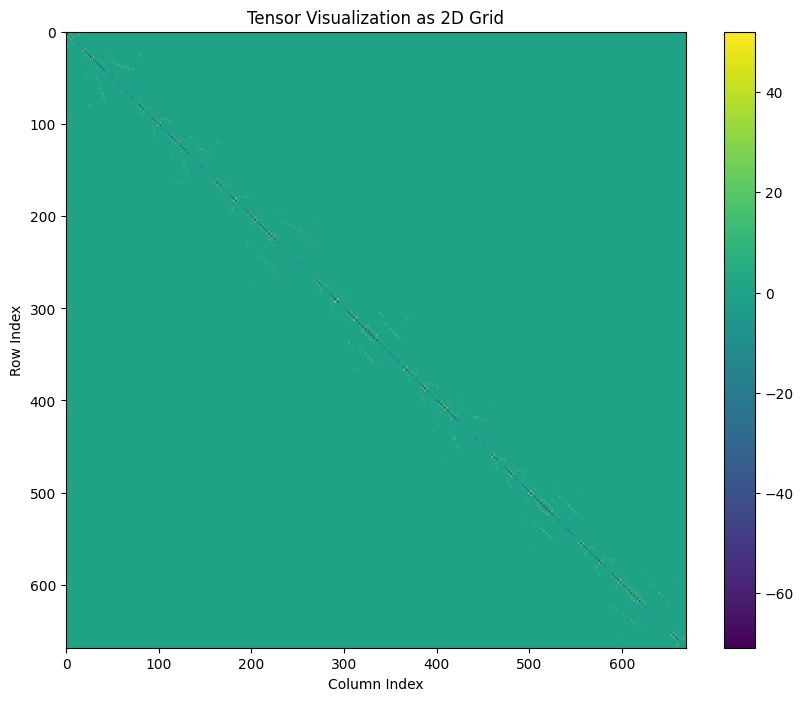

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Visualize the tensor as a 2D grid
plt.figure(figsize=(10, 8))
plt.imshow(tensor * 1.2, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Tensor Visualization as 2D Grid')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()


In [ ]:

# plt.figure(figsize=(10, 8))
# plt.imshow(tensor2, cmap='viridis', aspect='auto')
# plt.colorbar()
# plt.title('Tensor Visualization as 2D Grid')
# plt.xlabel('Column Index')
# plt.ylabel('Row Index')
# plt.show()
# print(f"AVERAGE ERROR: {(tensor - tensor2).abs().sum()}")
# std = 1.0759390592575073
# print(f"AVERAGE ERROR: {(tensor*std - tensor2).abs().sum()}")
# plt.figure(figsize=(10, 8))
# plt.imshow(tensor - tensor2, cmap='viridis', aspect='auto')
# plt.colorbar()
# plt.title('Tensor Visualization as 2D Grid')
# plt.xlabel('Column Index')
# plt.ylabel('Row Index')
# plt.show()

# plt.figure(figsize=(10, 8))
# plt.imshow((tensor + tensor.T)/2 - tensor2, cmap='viridis', aspect='auto')
# plt.colorbar()
# plt.title('Tensor Visualization as 2D Grid')
# plt.xlabel('Column Index')
# plt.ylabel('Row Index')
# plt.show()





# # Compute eigenvectors and eigenvalues
# eigenvalues, eigenvectors = np.linalg.eig(tensor)
# # Compute singular values
# u, s, vh = np.linalg.svd(tensor)

# # Reconstruct the matrix using the first 5 terms of its low-rank decomposition
# low_rank_approximation = np.zeros_like(tensor)

# for i in range(5):
#     low_rank_approximation += s[i] * np.outer(u[:, i], vh[i, :])

# # Visualize the low-rank approximation
# plt.figure(figsize=(10, 8))
# plt.imshow(low_rank_approximation, cmap='viridis', aspect='auto')
# plt.colorbar()
# plt.title('Low-Rank Approximation (First 5 Terms)')
# plt.xlabel('Column Index')
# plt.ylabel('Row Index')
# plt.show()





# # Visualize the eigenvalues (as a bar plot for simplicity)
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(eigenvalues)), np.sort(eigenvalues), color='blue')
# plt.title('Eigenvalues')
# plt.xlabel('Index')
# plt.ylabel('Eigenvalue')
# plt.show()


# # Visualize singular values (as a bar plot for simplicity)
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(s)), s, color='green')
# plt.title('Singular Values')
# plt.xlabel('Index')
# plt.ylabel('Singular Value')
# plt.show()

# # Visualizing the first eigenvector as an example
# plt.figure(figsize=(10, 6))
# plt.plot(eigenvectors[:, 0], color='red')
# plt.title('First Eigenvector')
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.show()
